# Programs
The programs below shows the iterations of our code trying to implement the PDF in the form of Python Code.

### Linear Probability Density Function
This is the Linear Implementation in Python of the **Probability Density Function** in a Python Function.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def linearPDF(mean: float, std_dev: float, plotGraph: bool = True):
    # Generate a range of x values
    x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 100)

    # Calculate the corresponding PDF values
    y = norm.pdf(x, mean, std_dev)

    # Plot the PDF
    if plotGraph:
        plt.plot(x, y)
        plt.title('Probability Density Function')
        plt.xlabel('x')
        plt.ylabel('Probability Density')
        plt.show()

# Example usage: plot_pdf(float(input("Enter Mu_X: ")), float(input("Enter Mu_Y: ")))

### Two-Dimensional Probability Density Function
This function presents the PDF in a two-dimensional form with available parameters: `mu_x, mu_y, sigma_x, sigma_y, rho, a, b, c, d`
> Parameters `a`, `b`, `c`, and `d` cannot be 0 as it would be invalid to calculate

In [14]:
import numpy as np
from scipy.stats import multivariate_normal

def twodimPDF(mu_x: float, mu_y: float, sigma_x: float, sigma_y: float, rho: float, a: float, b: float, c: float, d: float, plotGraph: bool = True):
    # Define the mean vector and covariance matrix
    mean = [mu_x, mu_y]
    covariance = [[sigma_x**2, rho*sigma_x*sigma_y], [rho*sigma_x*sigma_y, sigma_y**2]]

    # Get Scale Absolute value
    graphLength: float = max([abs(mu_x + b),abs(mu_x - a),abs(mu_x + a),abs(mu_x - b),abs(mu_y + c),abs(mu_y + d),abs(mu_y - c),abs(mu_y - d)])

    # Create a grid of points
    x = y = np.linspace(0, graphLength, 100) # For Unifying the plot graph X and Y axis scales (0 to calculated scale)
    norm_x, norm_y = np.linspace(mu_x - a, mu_x + b, 100), np.linspace(mu_y - c, mu_y + d, 100) # Calculates actual linear spaces

    X, Y = np.meshgrid(norm_x, norm_y) # Plots mesh grid slots according to actual linear

    # Stack the points into a 2D array
    pos = np.dstack((X, Y))

    # Create a multivariate normal distribution
    rv = multivariate_normal(mean, covariance, allow_singular=True)

    # Calculate the PDF
    pdf = rv.pdf(pos)

    # Plot the PDF
    if plotGraph:
        plt.figure(figsize=(8, 6))
        plt.contourf(x, y, pdf, cmap='viridis') # Draws plot graph according to the calculated scale on both axis
        plt.colorbar()
        plt.title('2D Gaussian Probability Density Function')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()

    return pdf

# Example Usage: twodimPDF(float(input("Enter Mu_X: ")), float(input("Enter Mu_Y: ")), float(input("Enter Sigma_X: ")), float(input("Enter Sigma_Y: ")), float(input("Enter Rho: ")), float(input("Enter A: ")), float(input("Enter B: ")), float(input("Enter C: ")), float(input("Enter D: ")))

We can use both functions and execute the following: (Example Cases: __0, 50, 1, 1, 0, 10, 10, 10, 10__)

In [15]:
mu_x, mu_y = float(input("Enter Mu_X: ")), float(input("Enter Mu_Y: "))

linearPDF(mu_x, mu_y)
twodimPDF(mu_x, mu_y, float(input("Enter Sigma_X: ")), float(input("Enter Sigma_Y: ")), float(input("Enter Rho: ")), float(input("Enter A: ")), float(input("Enter B: ")), float(input("Enter C: ")), float(input("Enter D: ")))

ValueError: could not convert string to float: ''

### The Quadratic Drag Coefficient Equation
The equation here presents this equation: $C_{\mathrm{D}}$ = $C \left({\pi \rho E d_{c}^{2} \over 32 \mu^{2}}\right)^{1/3} \mathrm{Re}^{-2/3}$

- $C_{\mathrm{D}}$ is the drag coefficient
- $C$ is a constant
- $\rho$ is the fluid density
- $E$ is the Young's modulus
- $d_c$ is the filament diameter
- $\mu$ is the dynamic viscosity
- $\mathrm{Re}$ is the Reynolds number

**Example Figures**
- C = 12 (dimensionless constant)
- rho = 1.2 kg/m^3 (fluid density of air)
- E = 70 GPa (Young's modulus for a polymer filament)
- dc = 100 μm (filament diameter)
- mu = 1.8×10^-5 Pa·s (dynamic viscosity of air)
- Re = 1000 (example Reynolds number)

The Code below presents a python function that substitutes the values of the equation as the parameters for the function.

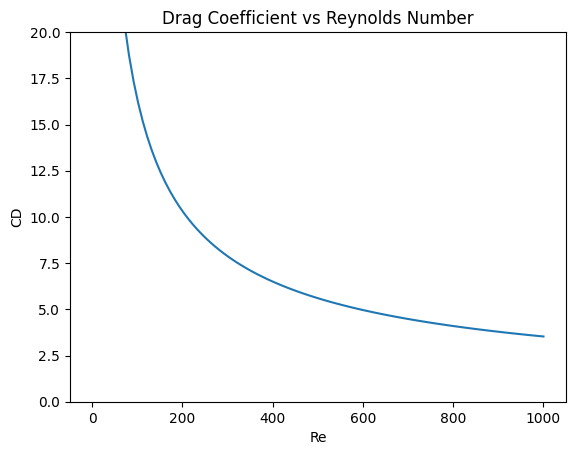

In [50]:
import matplotlib.pyplot as plt
import numpy as np

def drag_coefficient_plot(C: float, rho: float, E: float, dc: float, mu: float):
    # Range of Re
    Re_range = np.linspace(1, 1000, 100)
    
    # The equation
    CD = (C * ((np.pi * rho * E * dc**2) / (32 * mu**2))**(1/3)) * Re_range**(-2/3)
    
    # Limits the displaying Y scope of the graph
    plt.ylim(0, 20)
    
    # Plots the graph
    plt.plot(Re_range, CD)
    plt.xlabel('Re')
    plt.ylabel('CD')
    plt.title('Drag Coefficient vs Reynolds Number')
    plt.show()

C, rho, E, dc, mu = float(input("C: ")), float(input("rho (density): ")), float(input("E (Young's modulus): ")), float(input("dc (filament diameter): ")), float(input("mu (dynamic viscosity): "))
drag_coefficient_plot(C, rho, E, dc, mu)

An example input here:

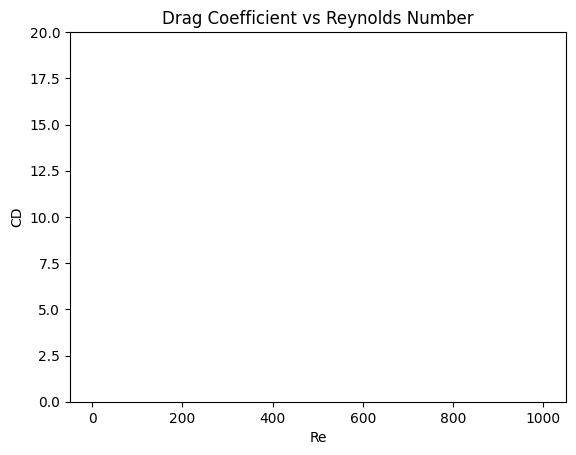

In [43]:
C, rho, E, dc, mu = float(input("C: ")), float(input("rho (density): ")), float(input("E (Young's modulus): ")), float(input("dc (filament diameter): ")), float(input("mu (dynamic viscosity): "))
drag_coefficient_plot(C, rho, E, dc, mu)